# <center> Simple function regression </center>

## Neural Network Scratch

<img src="images/regr.png" width = "50%">

* Why 2 hidden layers? No idea, it just works better this way. I guess playing with learning rate, sample size and training steps would allow to run the same with just one hidden layer.

## Imports

In [7]:
%matplotlib inline

import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rng = numpy.random # random number generator

## Settings

In [8]:
### NET ###

N = 1000           # number learning of samples
nTrainSteps = 100  # number of training steps
alpha = 0.1        # learning rate
nTestSamples = 100 # number of testing samples

### FUNCTION ###

def f (x): # function to find
  return x**2

# xrange for f(x)

minX = -10
maxX = 10

## Generate training sample

In [9]:
def randomX(n, a = minX, b = maxX): # n random number in the range [a,b]
    return ((b - a) * rng.sample(n) + a)

# generate training sample

X = randomX (N)       # random points [minX,maxX]
Y = [f(x) for x in X] # value of f

# normalize training sample

minY = min(Y) # minimum f(x) in the given x range
maxY = max(Y) # maximum f(x) in the given x range

def scale (x, a = minY, b = maxY): # scale from [a, b] to [0, 1] range
    return (x - a) / (b - a)

def scaleBack (x, a = minY, b = maxY): # scale from [0, 1] to [a, b]
    return (b - a) * x + a

Yn = [scale(y) for y in Y] # [minY, maxY] -> [0, 1], beacuse sigmoid in [0,1]

## Plot training sample

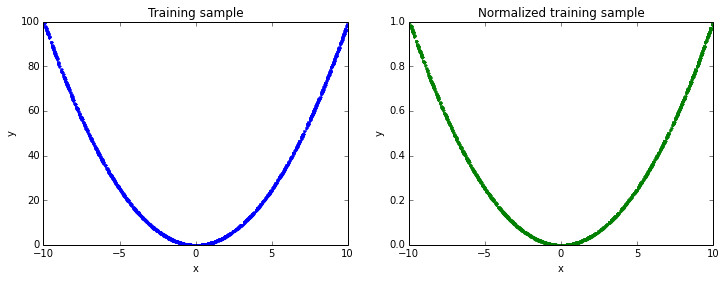

In [10]:
fig, plots = plt.subplots(1,2) # create a 1x2 grid of plots

fig.set_size_inches((2, 1) * fig.get_size_inches()) # double horizontal size of figure

# training sample

plots[0].set_title('Training sample')
plots[0].set_xlabel('x')
plots[0].set_ylabel('y')

plots[0].plot(X, Y, 'b.')

# normalized training sample

plots[1].set_title('Normalized training sample')
plots[1].set_xlabel('x')
plots[1].set_ylabel('y')

plots[1].plot(X, Yn, 'g.')

plt.show()

## Learn net

In [11]:
###### SYMBOLIC VARIABLES ###

x = T.vector('x') # input
y = T.scalar('y') # expected value

w1 = theano.shared(rng.rand(2,2), name = 'w1') # first hidden layer's weights (including bias)
w2 = theano.shared(rng.rand(3,2), name = 'w2') # second hidden layer's weights (including bias)
w3 = theano.shared(rng.rand(3), name = 'w3')   # output layer's weights (including bias)

### EXPRESSION GRAPH ###

def hlayer (x, w): # relu for hidden layers
    b = numpy.array([1])      # bias term
    xb = T.concatenate([x,b]) # input x with bias added
    return nnet.relu(T.dot(w.T,xb))

def layer (x, w): # sigmoid for output layer
    b = numpy.array([1])      # bias term
    xb = T.concatenate([x,b]) # input x with bias added
    return nnet.sigmoid(T.dot(w.T,xb))

hiddenLayer  = hlayer (x, w1)                 # hidden layer 1
hiddenLayer2 = hlayer (hiddenLayer, w2)       # hidden layer 2
outputLayer  = T.sum(layer(hiddenLayer2, w3)) # output layer

cost = (outputLayer - y)**2                   # cost function

def gradient (c, w):                 # cost function, weights
    return w - alpha * T.grad (c, w) # update weights

### COMPILE ###

train = theano.function(inputs = [x,y],
                        outputs = cost,
                        updates = [(w1, gradient(cost, w1)),
                                   (w2, gradient(cost, w2)),
                                   (w3, gradient(cost, w3))])

predict = theano.function(inputs=[x], outputs=outputLayer)

### TRAIN ###

for i in range (nTrainSteps):
    for j in range(N):
        c = train([X[j]], Yn[j]) 

## Test net

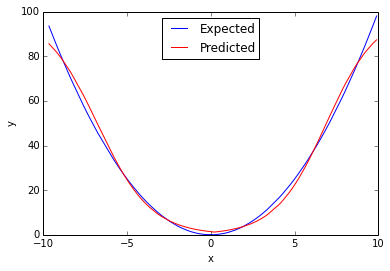

In [14]:
# prepare testing sample

test = (randomX(nTestSamples)) # random x values
test.sort()                    # sorted x values

expected  = [f(t) for t in test]                    # expexted values for test points
predicted = [scaleBack(predict([t])) for t in test] # predicited values for test points

plt.xlabel('x')
plt.ylabel('y')
plt.plot(test, expected, 'b', label = 'Expected')
plt.plot(test, predicted, 'r', label = 'Predicted')

plt.legend(loc=0) # legend in center

plt.show()